In [1]:
import numpy as np
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial import KDTree

In [2]:
# 读取数据
data = pd.read_csv(r'F:\cache_data\pre_property_table\ky\feature_ky.csv')

In [3]:
data = data[['LON','LAT','pH']]
data

,LON,LAT,pH
0,401530.0,3006305.0,5.64
1,401420.0,3005935.0,7.58
2,401845.0,3006295.0,5.01
3,402680.0,3006195.0,4.97
4,401960.0,3005920.0,5.77
...,...,...,...
7417,424040.0,2987165.0,7.88
7418,424675.0,2986700.0,7.03
7419,421020.0,3028200.0,6.69
7420,421805.0,3027380.0,6.20


In [4]:

points = data[['LON','LAT']].values
ph_values = data['pH'].values

In [5]:
# 构建KD树以便快速计算距离
tree = KDTree(points)

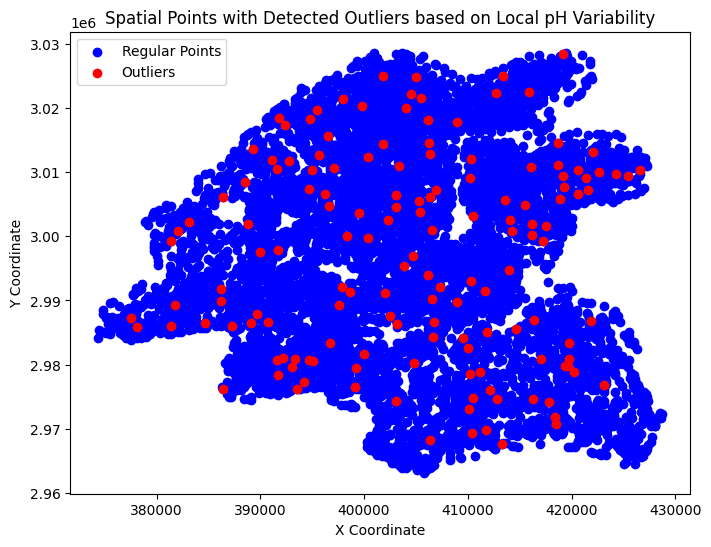

In [6]:
# 指定范围的阈值（例如，0.1代表10%的归一化距离）
distance_threshold = 1000

# 识别异常值
outliers = []
for i in range(len(points)):
    # 找到在距离阈值内的所有点
    indices = tree.query_ball_point(points[i], distance_threshold)

    # 计算这些点的pH值的均值和标准差
    if len(indices) > 1:  # 避免只有单个点的情况
        local_ph_values = ph_values[indices]
        mean_ph = np.mean(local_ph_values)
        std_ph = np.std(local_ph_values)

        # 判断当前点的pH值是否是离群值（例如超过均值2个标准差）
        if abs(ph_values[i] - mean_ph) > 2 * std_ph:
            outliers.append(int(i))  # 确保添加的是整数类型

outliers = np.unique(outliers)

# 可视化
plt.figure(figsize=(8, 6))
plt.scatter(points[:, 0], points[:, 1], color='blue', label='Regular Points')
plt.scatter(points[outliers, 0], points[outliers, 1], color='red', label='Outliers')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Spatial Points with Detected Outliers based on Local pH Variability')
plt.legend()
plt.show()


In [8]:
data.iloc[6]

LON     403110.00
LAT    3006380.00
pH           7.83
Name: 6, dtype: float64

In [7]:
outliers,len(outliers)

(array([   6,   15,   43,   63,   83,  116,  133,  145,  215,  232,  251,
         292,  296,  322,  334,  397,  448,  516,  636,  680,  702,  781,
         827,  863,  893,  932,  942, 1131, 1243, 1322, 1398, 1414, 1457,
        1510, 1581, 1589, 1667, 1679, 1957, 1979, 2048, 2163, 2205, 2229,
        2308, 2433, 2459, 2491, 2543, 2602, 2738, 2751, 2902, 2910, 2928,
        3000, 3055, 3102, 3173, 3222, 3235, 3334, 3337, 3345, 3358, 3391,
        3430, 3517, 3567, 3622, 3624, 3656, 3722, 3890, 3927, 3944, 3967,
        3976, 4009, 4085, 4125, 4187, 4206, 4222, 4228, 4255, 4269, 4273,
        4328, 4403, 4420, 4464, 4530, 4551, 4562, 4573, 4597, 4653, 4705,
        4711, 4749, 4878, 4969, 4978, 5011, 5038, 5039, 5090, 5123, 5172,
        5291, 5346, 5431, 5443, 5462, 5501, 5557, 5610, 5702, 5772, 5836,
        6008, 6023, 6077, 6121, 6146, 6152, 6201, 6210, 6360, 6494, 6530,
        6534, 6543, 6551, 6560, 6615, 6648, 6671, 6789, 6889, 6899, 6916,
        7052, 7084, 7163, 7254, 7384, 